In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from torchvision import transforms#, datasets
from torch.utils.data import DataLoader
%matplotlib inline

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [67]:
device

'cpu'

In [68]:
transform = transforms.Compose([
    transforms.ToTensor()
])

#自動でダウンロードしてくる。train=Trueだとtrainデータ
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

In [69]:
num_batches = 100

In [70]:
#Tensorデータ取り扱いのためのインスタンス
train_dataloader = DataLoader(train_dataset, batch_size=num_batches, shuffle=True)

In [71]:
train_iter = iter(train_dataloader)

In [72]:
imgs, labels = train_iter.next()

In [74]:
imgs.size()

torch.Size([100, 1, 28, 28])

In [75]:
img = imgs[0]

In [76]:
img_permute = img.permute(1, 2, 0)

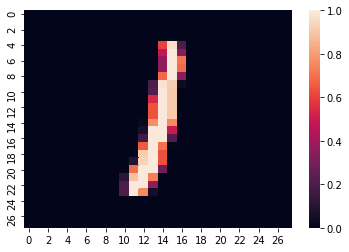

In [77]:
sns.heatmap(img_permute.numpy()[:, :, 0])

In [78]:
labels[0]

tensor(1)

In [79]:
img_permute.numpy()[:, :, 0].shape

(28, 28)

In [80]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(28 * 28, 400),
            nn.ReLU(inplace=True), 
            nn.Linear(400, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 10)
        )
    def forward(self, x):
        output = self.classifier(x)
        return output

In [81]:
model = MLP() ##デコレータ？

In [82]:
model.to(device)

MLP(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=400, out_features=200, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [86]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 50
losses = []
accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_dataloader:
        imgs = imgs.view(num_batches, -1)#ここよくわからん
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad() #optimizerの初期化。勾配の初期化
        output = model(imgs)
        loss = criterion(output, labels)
        running_loss = loss.item() ###わからん
        pred = torch.argmax(output, dim=1) ### わからん
        running_acc += torch.mean(pred.eq(labels).float()) ###わからん
        loss.backward()
        optimizer.step() #optimizerの更新
    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)
    print("epoch: {}, loss: {}, acc: {}".format(epoch, running_loss, running_acc))

epoch: 0, loss: 2.2897484401861827e-05, acc: 0.995698869228363
epoch: 1, loss: 1.8603653491785128e-06, acc: 0.9971985816955566
epoch: 2, loss: 2.1892832592129706e-07, acc: 0.9966820478439331
epoch: 3, loss: 2.562564176817735e-05, acc: 0.9972324371337891
epoch: 4, loss: 2.9652596761782964e-05, acc: 0.9970157146453857
epoch: 5, loss: 1.9750590581679717e-07, acc: 0.996982216835022
epoch: 6, loss: 1.2584123760461808e-05, acc: 0.9980822801589966
epoch: 7, loss: 6.239203382089423e-08, acc: 0.9977658987045288
epoch: 8, loss: 3.0275156799082955e-06, acc: 0.9975984692573547
epoch: 9, loss: 1.419397226224343e-05, acc: 0.9977492094039917
epoch: 10, loss: 1.6484088264405726e-05, acc: 0.9979662299156189
epoch: 11, loss: 9.071334109952052e-07, acc: 0.9973152875900269
epoch: 12, loss: 1.4474962760383883e-06, acc: 0.9986494779586792
epoch: 13, loss: 7.792295461210112e-07, acc: 0.998482882976532
epoch: 14, loss: 6.551058342059454e-05, acc: 0.9979661107063293
epoch: 15, loss: 8.634920353263927e-08, acc:

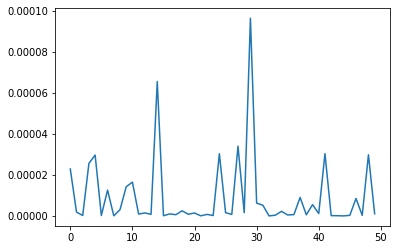

In [87]:
plt.plot(losses)

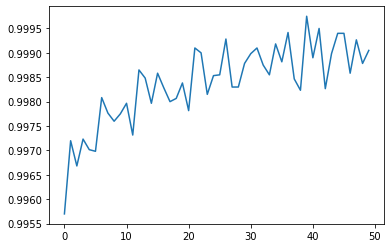

In [90]:
plt.plot(accs)

In [56]:
train_iter = iter(train_dataloader)

In [57]:
imgs, labels = train_iter.next()

In [58]:
labels

tensor([6, 3, 7, 7, 2, 1, 1, 1, 9, 6, 1, 9, 2, 2, 7, 0, 4, 5, 6, 0, 2, 6, 0, 3,
        4, 4, 8, 0, 6, 7, 9, 4, 3, 7, 7, 0, 2, 4, 1, 5, 3, 0, 1, 5, 4, 2, 3, 4,
        6, 1, 9, 8, 3, 5, 3, 5, 6, 8, 1, 9, 1, 4, 5, 1, 3, 3, 6, 0, 5, 7, 3, 9,
        1, 9, 0, 5, 4, 5, 4, 8, 5, 6, 6, 3, 4, 0, 3, 1, 6, 1, 9, 3, 4, 8, 7, 9,
        5, 2, 0, 0])

In [59]:
imgs_cpu = imgs.view(100, -1).to(device)
output = model(imgs_cpu)
pred = torch.argmax(output, dim=1)

In [60]:
pred

tensor([6, 3, 7, 7, 2, 1, 1, 1, 9, 6, 1, 9, 2, 2, 7, 0, 4, 5, 6, 0, 2, 6, 0, 3,
        4, 4, 8, 0, 6, 7, 9, 4, 3, 7, 7, 0, 2, 4, 1, 5, 3, 0, 1, 5, 4, 2, 3, 4,
        6, 1, 9, 8, 3, 5, 3, 5, 6, 8, 1, 9, 1, 4, 5, 1, 3, 3, 6, 0, 5, 7, 3, 9,
        1, 9, 0, 5, 4, 5, 4, 8, 5, 6, 6, 3, 4, 0, 3, 1, 6, 1, 9, 3, 4, 8, 7, 9,
        5, 2, 0, 0])

In [61]:
output

tensor([[-2.7397e+00, -8.9721e+00, -9.8253e+00, -1.1821e+01, -8.4539e+00,
         -3.3165e+00,  2.1909e+01, -1.5795e+01,  1.9923e+00, -9.6397e+00],
        [-1.1815e+01, -1.0814e+01,  8.5407e-02,  2.3995e+01, -1.5570e+01,
         -1.2706e+00, -2.5575e+01, -4.3049e+00, -2.0818e+00,  2.2224e+00],
        [-4.4151e+00, -5.4966e+00, -2.1645e+00, -3.7065e+00, -4.1978e+00,
         -8.6827e+00, -1.9447e+01,  1.8764e+01, -9.7652e+00,  3.2454e+00],
        [-7.7403e+00, -8.4445e+00, -1.1208e+01, -1.3046e+01, -8.4743e-01,
          5.6222e+00, -9.7442e+00,  1.5256e+01, -8.2835e+00, -1.8684e+00],
        [-7.3425e+00, -9.5491e-01,  1.7327e+01,  2.1709e+00, -7.3017e+00,
         -5.2958e+00, -9.2998e+00,  6.2633e-01, -5.5515e+00, -1.3012e+01],
        [-1.9007e+01,  2.1331e+01,  1.8431e-01, -1.6211e+01,  5.7677e+00,
         -6.2557e+00, -3.1881e+00, -1.5665e+00, -4.4397e+00, -1.2833e+01],
        [-1.5199e+01,  1.7384e+01, -3.2241e-01, -1.4027e+01,  3.9685e+00,
         -6.6889e+00, -4.1969e+0

In [91]:
from sklearn.metrics import roc_auc_score


In [99]:
roc_auc_score(pred.detach().numpy().reshape(-1, 1), labels.detach().numpy().reshape(-1, 1), multi_class='ovo')

ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

In [98]:
labels.detach().numpy()

array([5, 4, 6, 1, 4, 5, 2, 6, 7, 5, 5, 1, 1, 8, 9, 2, 1, 5, 3, 7, 1, 0,
       0, 2, 0, 3, 8, 6, 9, 0, 7, 4, 5, 8, 3, 1, 4, 8, 8, 0, 6, 8, 6, 4,
       9, 9, 1, 1, 0, 3, 5, 7, 6, 6, 7, 9, 7, 5, 5, 2, 7, 8, 4, 6, 6, 6,
       8, 5, 1, 7, 8, 6, 9, 2, 2, 3, 5, 0, 4, 8, 1, 2, 8, 4, 5, 4, 1, 0,
       2, 2, 2, 0, 9, 6, 2, 6, 1, 0, 2, 6])

In [100]:
roc_auc_score(pred, labels, multi_class='ovo')#argmaxになっているから確率で帰ってきていない

AxisError: axis 1 is out of bounds for array of dimension 1

# まとめ
udemyコード

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from torchvision import transforms#, datasets
from torch.utils.data import DataLoader
%matplotlib inline


## CPU or GPU使用の切り替え
device = "cuda" if torch.cuda.is_available() else "cpu"

## ダウンローダ
transform = transforms.Compose([
    transforms.ToTensor()
])

##自動でダウンロードしてくる。train=Trueだとtrainデータ。MNISTのtrainデータ
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

num_batches = 100
## Tensorデータ取り扱いのためのインスタンス
train_dataloader = DataLoader(train_dataset, batch_size=num_batches, shuffle=True)


## イメージの確認
# train_iter = iter(train_dataloader)
# imgs, labels = train_iter.next() #1枚取り出す
# imgs.size() #torch.Size([100, 1, 28, 28]) <-(batch, C, H, W)
# img = imgs[0]
# img_permute = img.permute(1, 2, 0) #(C, H, W)->(H, W, C)に変更
# sns.heatmap(img_permute.numpy()[:, :, 0]) #.numpy()[:, :, 0]で(H, W)に変換している(Cを落としている)
# labels[0]

## モデルの作成
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential( #Sequentialで続けて書ける
            nn.Linear(28 * 28, 400),
            nn.ReLU(inplace=True), 
            nn.Linear(400, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 10)
        )
    def forward(self, x):
        output = self.classifier(x)
        return output
    
## modelインスタンスの生成
model = MLP() #デコレータ？
model.to(device) #GPU or CPUに送る

# 損失関数の設定(一般に回帰->MSE, クラス分類->CrossEntropy)
criterion = nn.CrossEntropyLoss()

# 最適化手法の設定(Adamが一般的。他にはSDGとか)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# epoch数(学習回数)の設定
num_epochs = 50
losses = []
accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_dataloader:
        imgs = imgs.view(num_batches, -1)#ここよくわからん。(batch, C*H*W)になってる？
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad() #optimizerの初期化。勾配の初期化
        output = model(imgs) #(batch, C*H*W)が渡ってる？それでいいの？
        loss = criterion(output, labels)
        running_loss = loss.item() ###わからん
        pred = torch.argmax(output, dim=1) ### わからん。
        running_acc += torch.mean(pred.eq(labels).float()) ###わからん
        loss.backward()
        optimizer.step() #optimizerの更新
    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)
    print("epoch: {}, loss: {}, acc: {}".format(epoch, running_loss, running_acc))
    
plt.plot(losses) #損失の変化
plt.plot(accs) #精度の変化

# まとめ
小川本  
https://www.amazon.co.jp/%E3%81%A4%E3%81%8F%E3%82%8A%E3%81%AA%E3%81%8C%E3%82%89%E5%AD%A6%E3%81%B6-%E6%B7%B1%E5%B1%A4%E5%BC%B7%E5%8C%96%E5%AD%A6%E7%BF%92-PyTorch%E3%81%AB%E3%82%88%E3%82%8B%E5%AE%9F%E8%B7%B5%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0-%E6%A0%AA%E5%BC%8F%E4%BC%9A%E7%A4%BE%E9%9B%BB%E9%80%9A%E5%9B%BD%E9%9A%9B%E6%83%85%E5%A0%B1%E3%82%B5%E3%83%BC%E3%83%93%E3%82%B9-%E5%B0%8F%E5%B7%9D%E9%9B%84%E5%A4%AA%E9%83%8E/dp/4839965625  

1. データの前処理
2. DataLoaderの作成  
    2.1 訓練データとテストデータに分割  
    2.2 numpyでーたをTensorに変換  
    2.3 データとラベルをセットにしたDatasetを作成  
    2.4 DatasetをDataLoaderに変換
3. ネットワークの構築
4. 損失関数と最適化手法の設定
5. 学習と推論の設定
6. 実行

In [ ]:
# 1.データの前処理
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', data_home="./MNISIT_data") #version1のタグは不要

## データの可視化
# import matplotlib.pyplot as plt #openmlもC, H, Wで入ってるっぽい
# %matplotlib inline

# plt.imshow(X[0].reshape(28, 28))#784 = 28*28
# print("この画像データのラベルは{}です".format(y[0]))

# 2. DataLoaderの作成
## 2.1 訓練データとテストデータに分割(1:6)
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
X = mnist.data / 255 #どんなデータでもやる
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

## 2.2 numpyデータをTensorに変換
X_train = torch.Tensor(X_train) #数値データはTensor
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train.astype(np.int32)) #カテゴリカルデータはLongTensor。そのままだとobject型になっているのでnumpy.int型に変更
y_test = torch.LongTensor(y_test.astype(np.int32))

## 2.3 データとラベルをセットにしたDatasetを作成
ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

## 2.4 DatasetをDataLoaderに変換
loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False) # shuffleは不要

# 3. ネットワークの構築
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(28 * 28 * 1, 400),
            nn.ReLU(inplace=True),
            nn.Linear(400, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 10)
        )
        
    def forward(self, x):
        output = self.classifier(x)
        return output


model = MLP()
##　modelの確認
# print(model)

# 4. 損失関数と最適化手法の設定
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 5. 学習と推論の設定
def train(epoch):
    model.train() #学習モードに切り替え

    for data, targets in loader_train: #バッチごとにforループ。data:(batch, 28*28*1)
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward() #逆誤差伝搬
        optimizer.step() #逆誤差伝搬の値で重み更新
    
    print("epoch{} :終了\n".format(epoch))

# 6. 実行
for epoch in range(5):
    train(epoch)

# trainだけ結果確認
# train_iter = iter(loader_test)
# imgs, labels = train_iter.next()
# output = model(imgs)
# pred = torch.argmax(output, dim=1)

In [19]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', data_home="./MNISIT_data") #version1のタグは不要

/Users/yocchan/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/datasets/_openml.py:57: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


In [26]:
mnist.data.shape #28*28=784のデータが70000枚

(70000, 784)

In [28]:
X = mnist.data / 255
y = mnist.target

この画像データのラベルは5です


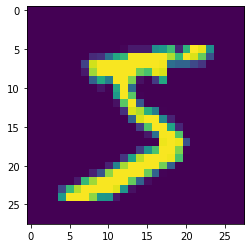

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X[0].reshape(28, 28))#784 = 28*28
print("この画像データのラベルは{}です".format(y[0]))

In [51]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

In [58]:
X_train = torch.Tensor(X_train) #数値データはTensor
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train.astype(np.int32)) #カテゴリカルデータはLongTensor。そのままだとobject型になっているのでnumpy.int型に変更
y_test = torch.LongTensor(y_test.astype(np.int32))


In [57]:
y_train.astype(np.int32)

array([7, 3, 0, ..., 7, 1, 1], dtype=int32)

In [59]:
ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

In [61]:
ds_train?

Type:        TensorDataset
String form: <torch.utils.data.dataset.TensorDataset object at 0x12df18b20>
Length:      60000
File:        ~/.pyenv/versions/3.8.0/lib/python3.8/site-packages/torch/utils/data/dataset.py
Docstring:  
Dataset wrapping tensors.

Each sample will be retrieved by indexing tensors along the first dimension.

Args:
    *tensors (Tensor): tensors that have the same size of the first dimension.


In [63]:
loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False) # shuffleは不要

In [64]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(28 * 28 * 1, 400),
            nn.ReLU(inplace=True),
            nn.Linear(400, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 10)
        )
        
    def forward(self, x):
        output = self.classifier(x)
        return output

In [65]:
model = MLP()
print(model)

MLP(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=400, out_features=200, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [66]:
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [71]:
def train(epoch):
    model.train() #学習モードに切り替え

    for data, targets in loader_train: #バッチごとにforループ。data:(batch, 28*28*1)
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward() #逆誤差伝搬
        optimizer.step() #逆誤差伝搬の値で重み更新
    
    print("epoch{} :終了\n".format(epoch))

In [70]:
for d, t in loader_train:
    print(d.shape)

torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size

In [72]:
for epoch in range(5):
    train(epoch)

epoch0 :終了

epoch1 :終了

epoch2 :終了

epoch3 :終了

epoch4 :終了



In [98]:
train_iter = iter(loader_test)
imgs, labels = train_iter.next()
output = model(imgs)
pred = torch.argmax(output, dim=1)

In [79]:
labels

tensor([0, 4, 1, 2, 7, 9, 7, 1, 1, 7, 1, 3, 4, 2, 6, 4, 6, 7, 3, 3, 7, 0, 5, 7,
        6, 5, 6, 4, 7, 4, 3, 5, 0, 1, 4, 6, 3, 9, 4, 5, 8, 0, 9, 6, 0, 9, 7, 5,
        7, 1, 0, 1, 3, 5, 5, 0, 5, 0, 0, 3, 7, 5, 1, 8])

In [81]:
imgs.shape

torch.Size([64, 784])